<a href="https://colab.research.google.com/github/Sevanip/Python-Data201/blob/main/Data201_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NYC Public Schools Regents Exam Data Analysis

#Research Question: Did NYC Public schools improve performance in the regents exam for common core algebra, Algebra2/Trigonometry? 

In [2]:
#Importing the following libraries, pandas, numpy, seaborn, in order to analyse the Data
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [4]:
#i will call various functions so i can see what information i have to work with from the dataframe
df.head()#Checking the top first 5 rows of the df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
df.tail()#Checking the end last 5 rows of the df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [7]:
df.shape

(212331, 15)

#Cleaning the data

In [8]:
#columns i need to keep: school name, regents exam, mean score, year. I can remove all other columns since i don't need them for this analysis. 

In [9]:
df.isnull().sum() #checking for missing data

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [10]:
#before i go ahead and remove the missing data, i see some 's' in a few columns which i don't need. 
#converting missing values to standard missing values.
missing_values = ["n/a", "na", "s", "--"]
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)

In [11]:
df.isnull().sum() #checking for missing data after converting missing valuse to standard missing values

School DBN                          0
School Name                         0
School Level                        0
Regents Exam                       10
Year                                0
Total Tested                        0
Mean Score                      75222
Number Scoring Below 65         75222
Percent Scoring Below 65        75222
Number Scoring 65 or Above      75222
Percent Scoring 65 or Above     75222
Number Scoring 80 or Above      75222
Percent Scoring 80 or Above     75222
Number Scoring CR              142680
Percent Scoring CR             142680
dtype: int64

In [12]:
df1 = df.dropna() #dropping all missing values

In [13]:
#dropping the colums i won't be using.
drop_cols = ['School DBN', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']
df1.drop(drop_cols, inplace = True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df1.isnull().sum() #checking for missing data after dropping standard missing values and dropping columns i won't be using. 

School Name     0
School Level    0
Regents Exam    0
Year            0
Total Tested    0
Mean Score      0
dtype: int64

#Visualizations

In [15]:
df2 = df1.loc[df1['Regents Exam'] == 'Common Core Algebra'] #creating new dataframe for Common Core Algebra only.

In [24]:
df2.groupby(['Year'])['Mean Score'].mean() #checking the mean of the mean scores by year for Common core algebra

Year
2015    63.168262
2016    68.681682
2017    69.963809
Name: Mean Score, dtype: float64

[Text(0.5, 1.0, 'Common Core Algebra')]

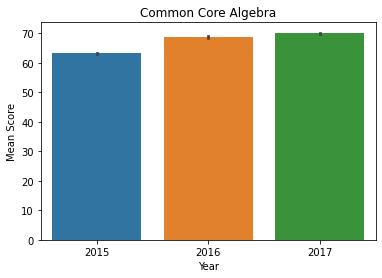

In [36]:
sns.barplot(x="Year", y="Mean Score", data=df2).set(title='Common Core Algebra')

In [ ]:
#Conclusion1: On average schools did improve a little over the 3 year period from 2015-2017 in the regents Common core Algebra exam.

In [18]:
df3 = df1.loc[df1['Regents Exam'] == 'Algebra2/Trigonometry'] #creating new dataframe df3 for Algebra2/Trigonometry only.

In [25]:
df3.groupby(['Year'])['Mean Score'].mean() #checking the mean of the mean scores by year for Algebra2/Trignonometry

Year
2015    57.276965
2016    56.382823
2017    52.847756
Name: Mean Score, dtype: float64

[Text(0.5, 1.0, 'Algebra2/Trigonometry')]

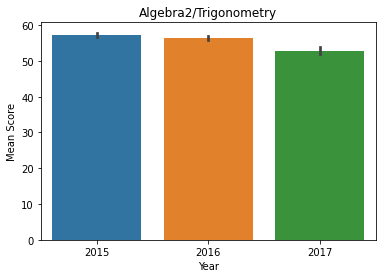

In [35]:
sns.barplot(x="Year", y="Mean Score", data=df3).set(title='Algebra2/Trigonometry')

In [ ]:
#Conclusion2: On average schools did not improve over the 3 year period from 2015-2017 in the regents Algebra2/Trigonometry exam.

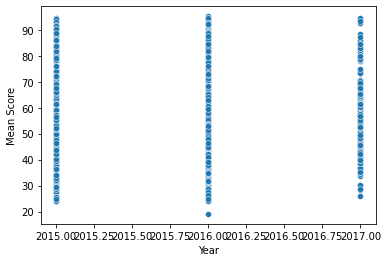

In [20]:
sns.scatterplot(x="Year", y="Mean Score", data=df3) #Just looking at the data on a scatterplot 

In [26]:
frames = [df2, df3]
df4 = pd.concat(frames) #combining df2(common core algebra) and df4(Algebra2/Trigonometry)

In [27]:
df4

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
8,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
9,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0
10,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8
12,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9
13,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0
...,...,...,...,...,...,...
212218,KIPP Academy Charter School,K-12 all grades,Algebra2/Trigonometry,2015,19,67.5
212219,KIPP Academy Charter School,K-12 all grades,Algebra2/Trigonometry,2015,35,72.1
212220,KIPP Academy Charter School,K-12 all grades,Algebra2/Trigonometry,2016,14,68.4
212221,KIPP Academy Charter School,K-12 all grades,Algebra2/Trigonometry,2016,50,72.9


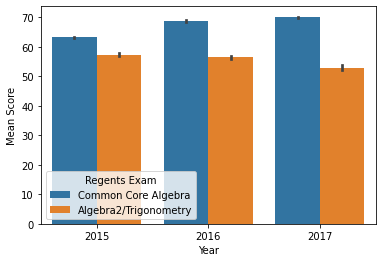

In [29]:
sns.barplot(x="Year", y="Mean Score", hue="Regents Exam", data=df4) #Comparing the mean score of both Regents exam side by side, we can clearly see for CCA there is a slight increase while it is the opposite for A2/T

In [31]:
#Here i want to do the same comparisons but only for one school
df5 = df4[df4['School Name']== 'Forest Hills High School'] #creating a dataframe df5 with data for Forest hills High school only.
df5

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
15581,Forest Hills High School,High school,Common Core Algebra,2015,442,69.2
15582,Forest Hills High School,High school,Common Core Algebra,2016,861,73.0
15583,Forest Hills High School,High school,Common Core Algebra,2017,963,71.9
47313,Forest Hills High School,High school,Common Core Algebra,2015,414,70.0
47314,Forest Hills High School,High school,Common Core Algebra,2015,28,56.4
...,...,...,...,...,...,...
198521,Forest Hills High School,High school,Algebra2/Trigonometry,2016,210,78.3
198522,Forest Hills High School,High school,Algebra2/Trigonometry,2016,54,65.9
198523,Forest Hills High School,High school,Algebra2/Trigonometry,2016,171,68.5
198524,Forest Hills High School,High school,Algebra2/Trigonometry,2016,21,73.1


[Text(0.5, 1.0, 'Forest Hills High School')]

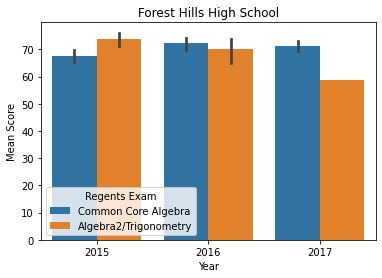

In [37]:
sns.barplot(x="Year", y="Mean Score", hue="Regents Exam", data=df5).set(title='Forest Hills High School') #Data for Forest Hills High School only

In [ ]:
#Conclusion3: FHHS there's an increase from 2015-2016 and very small decrease from 2016-2017 in CCA and a decrease in performance for A2/T from 2015-2017.

In [41]:
df6 = df3[df3['School Name']== 'Forest Hills High School']

In [43]:
df6.groupby(['Year'])['Mean Score'].mean() ##checking the mean of the mean scores by year for Algebra2/Trignonometry - FHHS

Year
2015    73.700000
2016    70.072727
2017    58.700000
Name: Mean Score, dtype: float64

In [44]:
df7 = df2[df2['School Name']== 'Forest Hills High School']

In [45]:
df7.groupby(['Year'])['Mean Score'].mean() ##checking the mean of the mean scores by year for Common Core Algebra - FHHS

Year
2015    67.676923
2016    72.246154
2017    71.369231
Name: Mean Score, dtype: float64

In [ ]:
"""
Conclusion1: On average schools did improve a little over the 3 year period from 2015-2017 in the regents Common core Algebra exam.
Conclusion2: On average schools did not improve over the 3 year period from 2015-2017 in the regents Algebra2/Trigonometry exam.
Conclusion3: FHHS there's an increase from 2015-2016 and very small decrease from 2016-2017 in CCA and a decrease in performance for A2/T from 2015-2017.
"""